<a href="https://colab.research.google.com/github/jadhav-rakesh/NLP/blob/main/movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd

In [3]:
dataset, info = tfds.load("glue/sst2", with_info=True)
print(info.features)
print(info.features["label"].num_classes)
print(info.features["label"].names)

FeaturesDict({
    'idx': int32,
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'sentence': Text(shape=(), dtype=string),
})
2
['negative', 'positive']


In [4]:
dataset_train, dataset_validation = dataset["train"], dataset["validation"]
dataset_train

<_PrefetchDataset element_spec={'idx': TensorSpec(shape=(), dtype=tf.int32, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'sentence': TensorSpec(shape=(), dtype=tf.string, name=None)}>

In [5]:
for example in dataset_train.take(2):
    review, label = example["sentence"], example["label"]
    print("Review:", review)
    print("Label: %d \n" % label.numpy())

Review: tf.Tensor(b'for the uninitiated plays better on video with the sound ', shape=(), dtype=string)
Label: 0 

Review: tf.Tensor(b'like a giant commercial for universal studios , where much of the action takes place ', shape=(), dtype=string)
Label: 0 



In [6]:
training_reviews = []
training_labels = []

validation_reviews = []
validation_labels = []

for item in dataset_train.take(10000):
    review, label = item["sentence"], item["label"]
    training_reviews.append(str(review.numpy()))
    training_labels.append(label.numpy())

print("\nNumber of training review is: ", len(training_reviews))

for i in range(0, 2):
    print(training_reviews[i])
    print(training_labels[i])

for item in dataset_validation.take(-1):
    review, label = item["sentence"], item["label"]
    validation_reviews.append(str(review.numpy()))
    validation_labels.append(label.numpy())

print("\nNumber of validation reviews is:", len(validation_reviews))

for i in range(0, 2):
    print(validation_reviews[i])
    print(validation_labels[i])


Number of training review is:  10000
b'for the uninitiated plays better on video with the sound '
0
b'like a giant commercial for universal studios , where much of the action takes place '
0

Number of validation reviews is: 872
b'a valueless kiddie paean to pro basketball underwritten by the nba . '
0
b"featuring a dangerously seductive performance from the great daniel auteuil , `` sade '' covers the same period as kaufmann 's `` quills '' with more unsettlingly realistic results . "
1


In [7]:
vocab_size = 4000
embedding_dim = 16
max_length = 50
trunc_type = "post"
pad_type = "post"
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_reviews)
word_index = tokenizer.word_index

In [11]:
training_sequences = tokenizer.texts_to_sequences(training_reviews)
training_padded = pad_sequences(training_sequences, maxlen=max_length,
                                truncating=trunc_type, padding=pad_type)

validation_sequences = tokenizer.texts_to_sequences(validation_reviews)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length)

training_labels_final = np.array(training_labels)
validation_labels_final = np.array(validation_labels)

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
num_epochs = 20
history = model.fit(training_padded, training_labels_final, epochs=num_epochs,
                    validation_data=(validation_padded, validation_labels_final))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5480 - loss: 0.6862 - val_accuracy: 0.5321 - val_loss: 0.6877
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5687 - loss: 0.6792 - val_accuracy: 0.5608 - val_loss: 0.6808
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5979 - loss: 0.6657 - val_accuracy: 0.5952 - val_loss: 0.6650
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6327 - loss: 0.6455 - val_accuracy: 0.6502 - val_loss: 0.6335
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6819 - loss: 0.6159 - val_accuracy: 0.7007 - val_loss: 0.6016
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7095 - loss: 0.5853 - val_accuracy: 0.7248 - val_loss: 0.5715
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7309 - loss: 0.5622 - val_accuracy: 0.7225 - val_loss: 0.5486
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7645 - loss: 0.5182 - val_accuracy: 0.

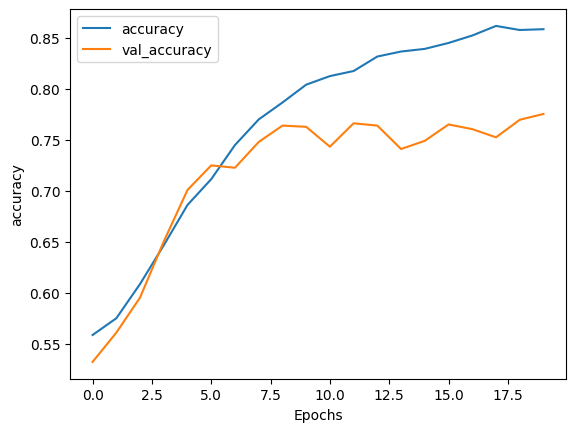

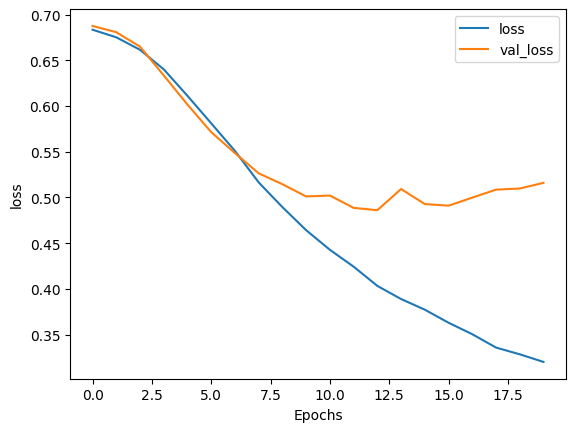

In [15]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_"+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, "val_"+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [19]:
# Write some new reviews

review1 = """I loved this movie"""

review2 = """that was the worst movie I've ever seen"""

review3 = """too much violence even for a Bond film"""

review4 = """a captivating recounting of a cherished myth"""

new_reviews = [review1, review2, review3, review4]


In [24]:
def predict_review(model, reviews):
    padding_type="post"
    sample_sequences = tokenizer.texts_to_sequences(reviews)
    reviews_padded = pad_sequences(sample_sequences, padding=padding_type,
                                   maxlen=max_length)
    classes = model.predict(reviews_padded)
    for x in range(len(reviews_padded)):
        print(reviews[x])
        print(classes[x])
        print("\n")

predict_review(model, new_reviews)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
I loved this movie
[0.3188351]


that was the worst movie I've ever seen
[0.09163713]


too much violence even for a Bond film
[0.0237931]


a captivating recounting of a cherished myth
[0.53231484]




In [29]:
def fit_model_and_show_results(model, reviews):
    tf.keras.backend.clear_session()
    model.summary()
    history = model.fit(training_padded, training_labels_final, epochs=num_epochs,
                        validation_data=(validation_padded, validation_labels_final))
    plot_graphs(history, "accuracy")
    plot_graphs(history, "loss")
    predict_review(model,  reviews)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5542 - loss: 0.6903 - val_accuracy: 0.5092 - val_loss: 0.6933
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5583 - loss: 0.6839 - val_accuracy: 0.5092 - val_loss: 0.6934
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5628 - loss: 0.6788 - val_accuracy: 0.5092 - val_loss: 0.6912
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5536 - loss: 0.6769 - val_accuracy: 0.5126 - val_loss: 0.6875
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5589 - loss: 0.6711 - val_accuracy: 0.5562 - val_loss: 0.6817
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5785 - loss: 0.6636 - val_accuracy: 0.5975 - val_loss: 0.6735
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6128 - loss: 0.6470 - val_accuracy: 0.6846 - val_loss: 0.6623
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6680 - loss: 0.6298 - val_accuracy: 0.

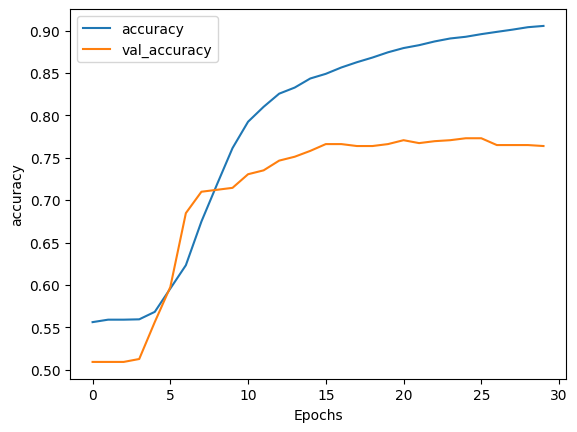

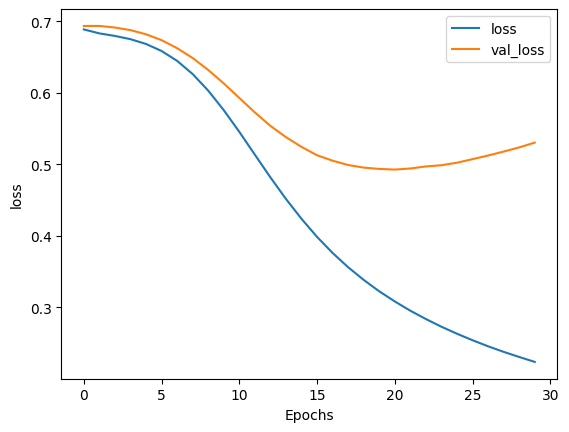

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
I loved this movie
[0.71203053]


that was the worst movie I've ever seen
[0.01467752]


too much violence even for a Bond film
[0.01560357]


a captivating recounting of a cherished myth
[0.7478784]




In [30]:
num_epochs = 30

model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(16, 5, activation="relu"),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

learning_rate = 0.0001

model_cnn.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate),
                  metrics=["accuracy"])

fit_model_and_show_results(model_cnn, new_reviews)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.5268 - loss: 0.6919 - val_accuracy: 0.5092 - val_loss: 0.6934
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.5685 - loss: 0.6860 - val_accuracy: 0.5092 - val_loss: 0.6950
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.5611 - loss: 0.6850 - val_accuracy: 0.5092 - val_loss: 0.6966
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.5631 - loss: 0.6831 - val_accuracy: 0.5092 - val_loss: 0.6986
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.5507 - loss: 0.6844 - val_accuracy: 0.5092 - val_loss: 0.7021
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.5525 - loss: 0.6817 - val_accuracy: 0.5092 - val_loss: 0.7068
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.5619 - loss: 0.6751 - val_accuracy: 0.5092 - val_loss: 0.7139
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.5610 - loss: 0.6696 - 

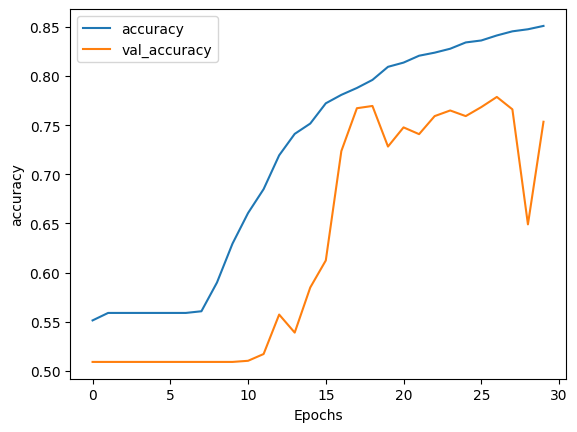

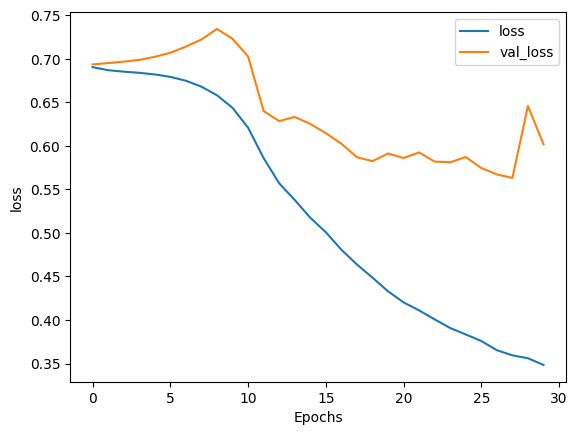

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
I loved this movie
[0.32687294]


that was the worst movie I've ever seen
[0.10710069]


too much violence even for a Bond film
[0.05646122]


a captivating recounting of a cherished myth
[0.42163256]




In [31]:
num_epochs = 30

model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

learning_rate = 0.00003

model_gru.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate),
                  metrics=["accuracy"])

fit_model_and_show_results(model_gru, new_reviews)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.5069 - loss: 0.6928 - val_accuracy: 0.5092 - val_loss: 0.6933
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.5624 - loss: 0.6874 - val_accuracy: 0.5092 - val_loss: 0.6960
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.5517 - loss: 0.6854 - val_accuracy: 0.5092 - val_loss: 0.7006
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.5567 - loss: 0.6833 - val_accuracy: 0.5092 - val_loss: 0.7037
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.5564 - loss: 0.6817 - val_accuracy: 0.5092 - val_loss: 0.7048
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.5518 - loss: 0.6818 - val_accuracy: 0.5092 - val_loss: 0.7067
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.5601 - loss: 0.6776 - val_accuracy: 0.5092 - val_loss: 0.7072
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.5591 - loss: 0.6763 - 

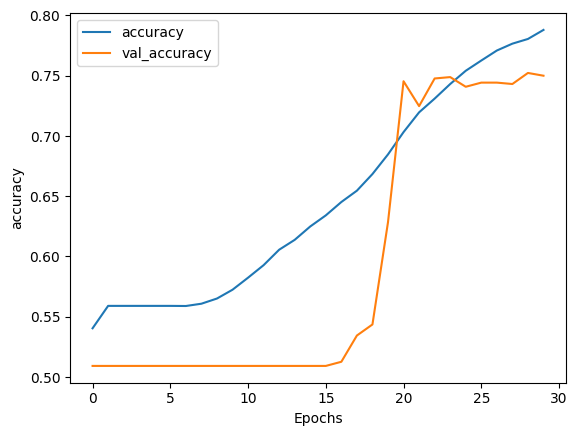

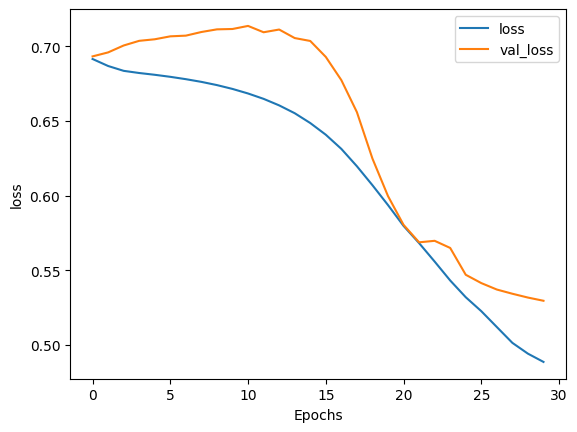

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
I loved this movie
[0.4586808]


that was the worst movie I've ever seen
[0.35379973]


too much violence even for a Bond film
[0.3337698]


a captivating recounting of a cherished myth
[0.48217443]




In [32]:
num_epochs = 30

model_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

learning_rate = 0.00003

model_bidi_lstm.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate),
                  metrics=["accuracy"])

fit_model_and_show_results(model_bidi_lstm, new_reviews)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 75ms/step - accuracy: 0.5499 - loss: 0.6909 - val_accuracy: 0.5092 - val_loss: 0.6935
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 65ms/step - accuracy: 0.5575 - loss: 0.6860 - val_accuracy: 0.5092 - val_loss: 0.6948
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.5583 - loss: 0.6848 - val_accuracy: 0.5092 - val_loss: 0.6960
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.5542 - loss: 0.6842 - val_accuracy: 0.5092 - val_loss: 0.6984
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.5594 - loss: 0.6820 - val_accuracy: 0.5092 - val_loss: 0.7015
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.5593 - loss: 0.6794 - val_accuracy: 0.5092 - val_loss: 0.7079
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.5673 - loss: 0.6737 - val_accuracy: 0.5092 - val_loss: 0.7137
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 69ms/step - accuracy: 0.5739 - loss: 0.6713 - 

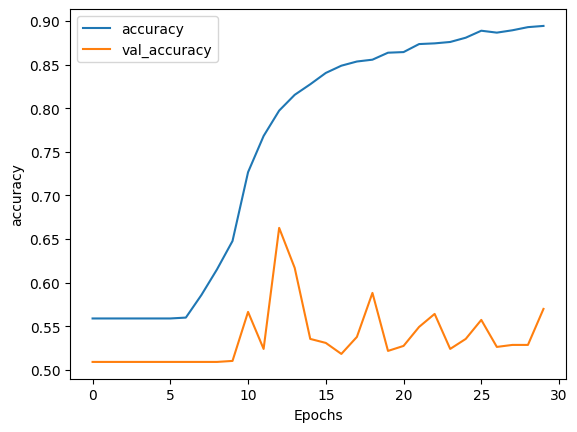

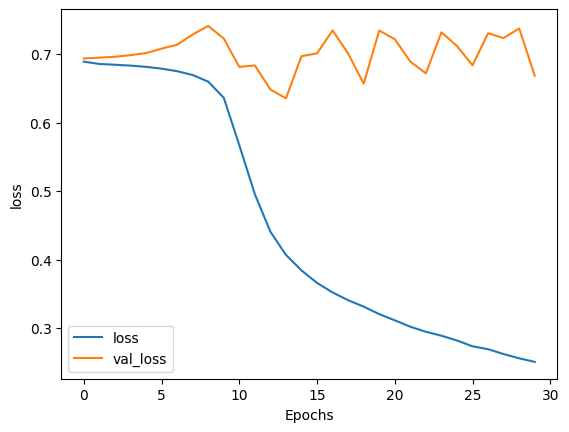

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
I loved this movie
[0.08509392]


that was the worst movie I've ever seen
[0.06166854]


too much violence even for a Bond film
[0.04257458]


a captivating recounting of a cherished myth
[0.38038963]




In [33]:
num_epochs = 30

model_multiple_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
                                                       return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

learning_rate = 0.00003

model_multiple_bidi_lstm.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate),
                  metrics=["accuracy"])

fit_model_and_show_results(model_multiple_bidi_lstm, new_reviews)

In [34]:
# Write some new reviews

review1 = """I loved this movie"""

review2 = """that was the worst movie I've ever seen"""

review3 = """too much violence even for a Bond film"""

review4 = """a captivating recounting of a cherished myth"""

review5 = """I saw this movie yesterday and I was feeling low to start with,
 but it was such a wonderful movie that it lifted my spirits and brightened
 my day, you can\'t go wrong with a movie with Whoopi Goldberg in it."""

review6 = """I don\'t understand why it received an oscar recommendation
 for best movie, it was long and boring"""

review7 = """the scenery was magnificent, the CGI of the dogs was so realistic I
 thought they were played by real dogs even though they talked!"""

review8 = """The ending was so sad and yet so uplifting at the same time.
 I'm looking for an excuse to see it again"""

review9 = """I had expected so much more from a movie made by the director
 who made my most favorite movie ever, I was very disappointed in the tedious
 story"""

review10 = "I wish I could watch this movie every day for the rest of my life"

more_reviews = [review1, review2, review3, review4, review5, review6, review7,
               review8, review9, review10]

In [35]:
print("============================\n","Embeddings only:\n", "============================")
predict_review(model, more_reviews)

 Embeddings only:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
I loved this movie
[0.31883517]


that was the worst movie I've ever seen
[0.09163715]


too much violence even for a Bond film
[0.0237931]


a captivating recounting of a cherished myth
[0.5323147]


I saw this movie yesterday and I was feeling low to start with,
 but it was such a wonderful movie that it lifted my spirits and brightened 
 my day, you can't go wrong with a movie with Whoopi Goldberg in it.
[0.24959207]


I don't understand why it received an oscar recommendation
 for best movie, it was long and boring
[0.40110996]


the scenery was magnificent, the CGI of the dogs was so realistic I
 thought they were played by real dogs even though they talked!
[0.1883261]


The ending was so sad and yet so uplifting at the same time. 
 I'm looking for an excuse to see it again
[0.42546037]


I had expected so much more from a movie made by the director 
 who made my most favorite movie ever, I was very disappointed in the tedio

In [36]:
print("============================\n","With CNN\n", "============================")
predict_review(model_cnn, more_reviews)

 With CNN
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
I loved this movie
[0.71203053]


that was the worst movie I've ever seen
[0.01467752]


too much violence even for a Bond film
[0.01560357]


a captivating recounting of a cherished myth
[0.7478783]


I saw this movie yesterday and I was feeling low to start with,
 but it was such a wonderful movie that it lifted my spirits and brightened 
 my day, you can't go wrong with a movie with Whoopi Goldberg in it.
[0.5299239]


I don't understand why it received an oscar recommendation
 for best movie, it was long and boring
[0.90520304]


the scenery was magnificent, the CGI of the dogs was so realistic I
 thought they were played by real dogs even though they talked!
[0.4134175]


The ending was so sad and yet so uplifting at the same time. 
 I'm looking for an excuse to see it again
[0.8168675]


I had expected so much more from a movie made by the director 
 who made my most favorite movie ever, I was very disappointed in the tedious 
 sto

In [37]:
print("===========================\n","With bidirectional GRU\n", "============================")
predict_review(model_gru, more_reviews)

 With bidirectional GRU
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
I loved this movie
[0.32687294]


that was the worst movie I've ever seen
[0.1071007]


too much violence even for a Bond film
[0.05646122]


a captivating recounting of a cherished myth
[0.4216325]


I saw this movie yesterday and I was feeling low to start with,
 but it was such a wonderful movie that it lifted my spirits and brightened 
 my day, you can't go wrong with a movie with Whoopi Goldberg in it.
[0.09040867]


I don't understand why it received an oscar recommendation
 for best movie, it was long and boring
[0.20440435]


the scenery was magnificent, the CGI of the dogs was so realistic I
 thought they were played by real dogs even though they talked!
[0.10190412]


The ending was so sad and yet so uplifting at the same time. 
 I'm looking for an excuse to see it again
[0.31197563]


I had expected so much more from a movie made by the director 
 who made my most favorite movie ever, I was very disappointed in t

In [38]:
print("===========================\n", "With a single bidirectional LSTM:\n", "===========================")
predict_review(model_bidi_lstm, more_reviews)

 With a single bidirectional LSTM:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
I loved this movie
[0.45868078]


that was the worst movie I've ever seen
[0.3537998]


too much violence even for a Bond film
[0.33376977]


a captivating recounting of a cherished myth
[0.48217443]


I saw this movie yesterday and I was feeling low to start with,
 but it was such a wonderful movie that it lifted my spirits and brightened 
 my day, you can't go wrong with a movie with Whoopi Goldberg in it.
[0.2211703]


I don't understand why it received an oscar recommendation
 for best movie, it was long and boring
[0.27316934]


the scenery was magnificent, the CGI of the dogs was so realistic I
 thought they were played by real dogs even though they talked!
[0.23891036]


The ending was so sad and yet so uplifting at the same time. 
 I'm looking for an excuse to see it again
[0.43555576]


I had expected so much more from a movie made by the director 
 who made my most favorite movie ever, I was very disapp

In [39]:
print("===========================\n", "With multiple bidirectional LSTM:\n", "==========================")
predict_review(model_multiple_bidi_lstm, more_reviews)

 With multiple bidirectional LSTM:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
I loved this movie
[0.08509392]


that was the worst movie I've ever seen
[0.06166854]


too much violence even for a Bond film
[0.04257457]


a captivating recounting of a cherished myth
[0.38038963]


I saw this movie yesterday and I was feeling low to start with,
 but it was such a wonderful movie that it lifted my spirits and brightened 
 my day, you can't go wrong with a movie with Whoopi Goldberg in it.
[0.10345005]


I don't understand why it received an oscar recommendation
 for best movie, it was long and boring
[0.10939807]


the scenery was magnificent, the CGI of the dogs was so realistic I
 thought they were played by real dogs even though they talked!
[0.39267978]


The ending was so sad and yet so uplifting at the same time. 
 I'm looking for an excuse to see it again
[0.3119778]


I had expected so much more from a movie made by the director 
 who made my most favorite movie ever, I was very disappoi